# Анализ убытков приложения ProcrastinatePRO+

Развлекательное приложения Procrastinate Pro+,несмотря на огромные вложения в рекламу, последние несколько месяцев приносит убытки компании. 

**Цель** — определить причины, сформировать рекомендации по оптимизации

**Задачи:**
- выявить каналы привлечения пользователей и типы устройств;
- рассчитать стоимость привлечения пользователей из различных рекламных каналов;
- рассчитать, сколько денег приносит каждый клиент;
- найти точку окупаемости расходов на привлечение клиентов;
- выявить факторы, мешающие привлечению клиентов.

**Исходные данные:**
данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях;
- выгрузка их покупок за этот период;
- рекламные расходы.

**Описание данных:**

Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта,

**orders_info_short.csv** — информацию о заказах,

**costs_info_short.csv** — информацию о расходах на рекламу.

**Структура visits_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура costs_info_short.csv:**
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.


**Пути к файлам:**
- /datasets/visits_info_short.csv.;
- /datasets/orders_info_short.csv.;
- /datasets/costs_info_short.csv.


**Ход исследования:**

*Раздел1. Изучение общей информации:*

* [1.1 Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [1.2.Предобработка данных](#2-bullet)
* [1.2.1 Предобработка данных. Название столбцов](#3-bullet)
* [1.2.2 Предобработка данных. Проверка на дубликаты](#4-bullet)
* [1.2.3 Предобработка данных. Вывод информации о датасетах](#5-bullet)
* [1.2.4 Предобработка данных. Проверка на неявные дубликаты.](#6-bullet)
* [1.3 Вывод по разделу 1](#7-bullet)

*Раздел2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии:*

* [1.Функция get_profiles() — для создания профилей пользователей](#8-bullet)
* [2.Функция get_retention() — для подсчёта  удержания (Retention Rate)](#9-bullet)
* [3.Функция get_conversion() — для подсчёта конверсии](#10-bullet)
* [4.Функция get_ltv() — для подсчёта LTV](#11-bullet)
* [5.Функция filter_data() — для сглаживания данных](#12-bullet)
* [6.Функция plot_retention() — для построения графика Retention Rate (визуализация удержания) ](#13-bullet)
* [7.Функция plot_conversion() — для построения графика конверсии ](#14-bullet)
* [8.Функция plot_ltv_roi — для визуализации LTV и ROI ](#15-bullet)


*Раздел3. Исследовательский анализ данных:*

* [1.Профили пользователей. Минимальная и максимальная даты привлечения пользователей.](#16-bullet)
* [2.Страны](#17-bullet)
* [3.Устройства](#18-bullet)
* [4. Рекламные источники](#19-bullet)
* [5.Вывод по разделу 3](#20-bullet)



*Раздел4.Маркетинг:*

* [1.Общая сумма расходов на маркетинг](#21-bullet)
* [2.Распределение расходов по источникам](#22-bullet)
* [3.Динамика распределения расходов во времени](#23-bullet)
* [4.Привлечение одного пользователя (CAC) из каждого источника](#24-bullet)
* [5.Вывод по разделу 4](#25-bullet)



*Раздел5. Оценка окупаемости рекламы:*
* [1.Момент и горизонт анализа данных](#26-bullet)
* [2.Анализ общей окупаемости рекламы. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#27-bullet)
* [3.Анализ окупаемости рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#28-bullet)
* [4.Анализ окупаемости рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#29-bullet)
* [5.Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#30-bullet)
* [6.Анализ конверсии пользователей и динамики её изменения. Анализ удержания пользователей и динамики его изменения. Графики конверсии и удержания.](#31-bullet)
* [7.Удержание и динамиĸа](#32-bullet)
* [8.Ответы на вопросы](#33-bullet)
* [9.Дополнительное исследование профилей США](#34-bullet)
* [10.Вывод по разделу 5](#34-bullet)

*Раздел6. Общий вывод*
* [1.Общий вывод по исследованию](#36-bullet)

# 1. Изучение общей информации

<a id='1-bullet'></a>

## Изученеие файлов с данными, получение общей информации, загрузка библиотек

Загрузка  файлов с данными и знакомство с датасетом, чтобы иметь представление, с чем предстоит работать далее и провести первичный визуальный анализ данных.

Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np #отвечает за высокоуровневые математические функции
import matplotlib.pyplot as plt #для работы с графиками (в том числе гистограммами)
import seaborn as sns #библиотека для визуализации данных
from datetime import datetime,timedelta #библиотека datetime используется для работы со временем и датами
from scipy import stats as st #  пакет статистических функций

Загрузка данных

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

Проверка вывода данных. Вывод первых 5 строк датафреймов visits,orders,costs

In [3]:
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Из выведенной части таблиц видно что в качестве предобработки потребуется:
- приведение названия столбцов и их содержимого к нижнему регистру
- корректировка названий столбцов с пробелами

<a id='2-bullet'></a>

## Предобработка данных

<a id='3-bullet'></a>
**Предобработка данных. Название столбцов.**

Переводим название столбцов в нижни регистр.Далее откорректируем название с пробелами.

In [4]:
#приведем к нижнему регистру название столбцов
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
#приведем к нижнему регистру region,device,channel чтобы избежать неявные дубликаты
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

#корректируем названия с пробелами
visits=visits.rename(columns={'user id':'user_id',
                             'session start':'session_start',
                             'session end':'session_end'})
orders=orders.rename(columns={'user id':'user_id',
                             'event dt':'event_dt'})

#проверим, прошла ли замена названия столбцов успешно:


display('DataSet visits:',#вывод названия датасета
        visits.head())
display('DataSet orders:',
        orders.head())
display('DataSet costs:',
        costs.head())

'DataSet visits:'

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


'DataSet orders:'

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


'DataSet costs:'

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


<a id='4-bullet'></a>

**Предобработка данных. Проверка на дубликаты.**

Проверка всех датасетов на наличие дубликатов строк в данных

In [5]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

В датасетах отсутсвуют явные дубликаты данных.

<a id='5-bullet'></a>
**Предобработка данных. Вывод информации о датасетах.**

Выведем общую информацию о датасетах, чтобы познакомиться с форматами данных и увидеть количество пропущенных значений.

In [6]:
display('DataSet visits:')#вывод названия датасета
visits.info()# вывод общей информации о датасете
display('-'*70)# разделитель, чтобы визуально отделить данные одного датасета от другого

display('DataSet orders:')
orders.info()
display('-'*70)

display('DataSet costs:')
costs.info()

'DataSet visits:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'----------------------------------------------------------------------'

'DataSet orders:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'----------------------------------------------------------------------'

'DataSet costs:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В столбцах  visits,orders,costs отсутствуют пропуски.
Необходимо провести корректировку следующих данных в формат даты и времени:
- датасет visits: столбцы session_start и session_end
- датасет orders: столбец event_dt
- датасет costs: столбец dt

In [7]:
#перевод данных в формат дата и время
visits['session_start']=pd.to_datetime(visits['session_start'],
                                       format = '%Y-%m-%d %H:%M:%S')
visits['session_end']=pd.to_datetime(visits['session_end'],
                                       format = '%Y-%m-%d %H:%M:%S')
orders['event_dt']=pd.to_datetime(orders['event_dt'],
                                       format = '%Y-%m-%d %H:%M:%S')

costs['dt']=pd.to_datetime(costs['dt'],
                                       format = '%Y-%m-%d')
#проверка проведенных изменений
display('DataSet visits:')
visits.info()
display('-'*70)

display('DataSet orders:')
orders.info()
display('-'*70)

display('DataSet costs:')
costs.info()

'DataSet visits:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


'----------------------------------------------------------------------'

'DataSet orders:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


'----------------------------------------------------------------------'

'DataSet costs:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


<a id='6-bullet'></a>
**Предобработка данных.Проверка на неявные дубликаты.**

Проверим датасеты на наличие неявных дубликатов в содержимых столбцов region,device,channel

In [8]:
display('DataSet visits:')
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())

display('DataSet costs:')
display(costs['channel'].unique())

'DataSet visits:'

array(['united states', 'uk', 'france', 'germany'], dtype=object)

array(['iphone', 'mac', 'android', 'pc'], dtype=object)

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

'DataSet costs:'

array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

Значения в столбцах уникальные, неявные дубликаты отсутсвуют

<a id='7-bullet'></a>
## ВЫВОД ПО РАЗДЕЛУ 1

В части предобработки данных была проделана следующая работа:
- загрузка библиотек и файлов с данными и первичное ознакомление
- приведение названия  столбцов и их содержимого к нижнему регистру
- проверка на явные дубликаты: явные дубликаты отсутствуют
- проверка на неявные дубликаты: неявные дубликаты отсутсвуют
- проверка наличия пропущенных значений : пропуски в данных отсутсвуют
- проверка типа данных : замена типов данных в формат даты и времени
    (датасет visits: столбцы session_start и session_end;
     датасет orders: столбец event_dt;
     датасет costs: столбец dt)


# 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей;
- get_retention() — для подсчёта Retention Rate;
- get_conversion() — для подсчёта конверсии;
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:
- filter_data() — для сглаживания данных;
- plot_retention() — для построения графика Retention Rate;
- plot_conversion() — для построения графика конверсии;
- plot_ltv_roi — для визуализации LTV и ROI.


<a id='8-bullet'></a>
## Функция get_profiles() — для создания профилей пользователей

In [9]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    costs['dt']=pd.to_datetime(costs['dt']).dt.date
    

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = round(costs['costs'] / costs['unique_users'],2)

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


<a id='9-bullet'></a>
## Функция get_retention() — для подсчёта  удержания (Retention Rate)

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='10-bullet'></a>
## Функция get_conversion() — для подсчёта конверсии

In [11]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='11-bullet'></a>
## Функция get_ltv() — для подсчёта LTV

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a id='12-bullet'></a>
## Функция filter_data() — для сглаживания данных

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<a id='13-bullet'></a>
## Функция plot_retention() — для построения графика Retention Rate (визуализация удержания)

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<a id='14-bullet'></a>
## Функция plot_conversion() — для построения графика конверсии

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='15-bullet'></a>
## Функция plot_ltv_roi — для визуализации LTV и ROI

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# 3. Исследовательский анализ данных

На данном этапе будут произведены следующие действия:

- Составлены профили пользователей. Определены минимальная и максимальная даты привлечения пользователей.
- Проведено исследование, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих из каждой страны.
- Проведено исследование, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построена таблица, отражающая количество пользователей и долю платящих для каждого устройства.
- Изучены рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулированы выводы.

<a id='16-bullet'></a>
## Профили пользователей. Минимальная и максимальная даты привлечения пользователей.

Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [17]:
profiles=get_profiles(visits,orders,costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.23


Выберем минимальную и макимально позднюю дату привлечения пользоватей из датафрема profiles

In [18]:
display('Минимальная дата привлечения пользователей:',profiles['dt'].min())#минимальная дата привлечения

'Минимальная дата привлечения пользователей:'

datetime.date(2019, 5, 1)

In [19]:

display('Максимальная дата привлечения пользователей:',profiles['dt'].max()) #максимальная дата привлечения

'Максимальная дата привлечения пользователей:'

datetime.date(2019, 10, 27)

Полученные даты в предоставленных заказчиком таблицах совпадают с  заявленным ТЗ

<a id='17-bullet'></a>
## Страны

**Задача** 
- выяснить из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей; 
- построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Так как в этом и последющих блоках необходимо анализировать соотношение платящих пользователей по категории : страна, тип устройства и рекламный источник привлечения по схожему алгоритму, напишем функцию, которая сократит количество ввода одинакового кода.

In [20]:
profiles_raw=[]
profiles_pay=[]

# напишем функцию по анализу доли платящих пользователей от всех пользователей
def users_payers (profiles_raw,profiles_pay):
    #готовим профили для вывода данных(Все пользователи)
    profiles_raw=profiles.pivot_table(index=value, values='user_id',aggfunc='nunique')
    profiles_all=profiles_raw.rename(columns={'user_id':'total_users'})

    #готовим профили для вывода данных(Платящие пользователи)
    profiles_pay=profiles.query('payer == True').pivot_table(index=value, 
                                      values='user_id',aggfunc='nunique')
    profiles_payers=profiles_pay.rename(columns={'user_id':'pay_users'})
    #Соединяем полученные датасеты profiles_all  и profiles_payers в один
    profiles_connect=profiles_all.merge(profiles_payers, on=value,how='left')
     #Вычисляем дол платящих пользователей из общего числа пользователей
    profiles_connect['payers_share_from_total_users']=round(
        100*profiles_connect['pay_users']/profiles_connect['total_users'],2)
    profiles_connect
    
    #Вычисляем долю плятящих пользователей из всех платящих пользователей
    profiles_connect['payers_share_from_paying']=round(
        100*profiles_connect['pay_users']/profiles_connect['pay_users'].sum(),2)
    
    #Сортируем поле по доле платящих пользователей от общего числа пользователей 
    #по категории
    profiles_connect= profiles_connect.sort_values('payers_share_from_total_users',
                                                   ascending=False)
    profiles_connect= profiles_connect.reset_index()
    
    #Строим диаграмму для визуализации
    ax=plt.subplots(figsize=(15,6))#размер графика
    ax=sns.barplot(data=profiles_connect, x=value,y='payers_share_from_paying')
    plt.xticks(rotation=45)# угол наклона надписей
    plt.title('Доля платящих пользователей от общего числа платящих пользователей приложения,%')
    plt.xlabel("value")
    plt.ylabel("payers_share_from_paying ")

   

    return profiles_connect



,region,total_users,pay_users,payers_share_from_total_users,payers_share_from_paying
0,united states,100002,6902,6.90,77.72
1,germany,14981,616,4.11,6.94
2,uk,17575,700,3.98,7.88
3,france,17450,663,3.80,7.47


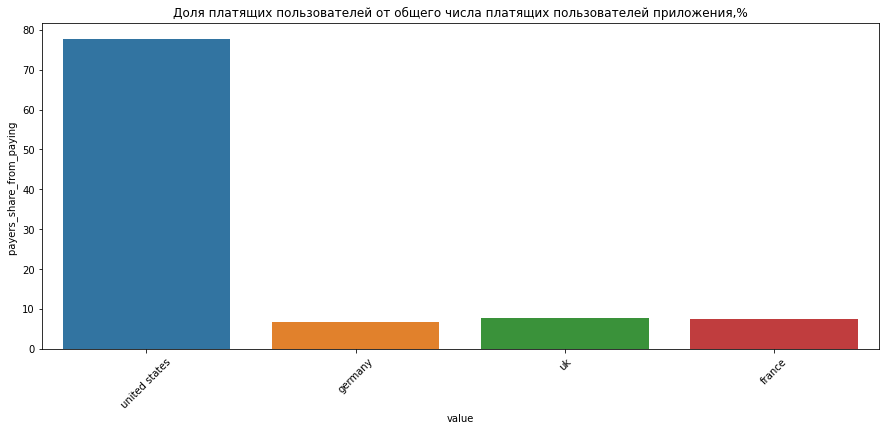

In [21]:
value='region'
users_payers(profiles_raw,profiles_pay)

**Выводы по странам**:

* Пользователи приложения заходят из США, Германии, Великобритании, Франции;
* Больше всего пользователей из США - 100 002;
* Больше всего пользователей, осуществляющих платежи, из США:их доля составляет 6,9% от от из 100002 пользователей из этого региона.
На втором месте платящие пользователи из германии-их 4,11 % от  14 981 пользователей этого региона.При этом общее количество пользователей из Германии самое маленькое.
На теретьем месте, с небольшим отрывом от Германии, идут плательщики из Великобритании- 3,98% от 17 575 пользователей этого региона.
На четвертом месте  плательщики из Франции- 3,80%  от 17450 пользователей.

<a id='18-bullet'></a>
## Устройства

**Задача**
-  узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи;
- построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

,device,total_users,pay_users,payers_share_from_total_users,payers_share_from_paying
0,mac,30042,1912,6.36,21.53
1,iphone,54479,3382,6.21,38.08
2,android,35032,2050,5.85,23.08
3,pc,30455,1537,5.05,17.31


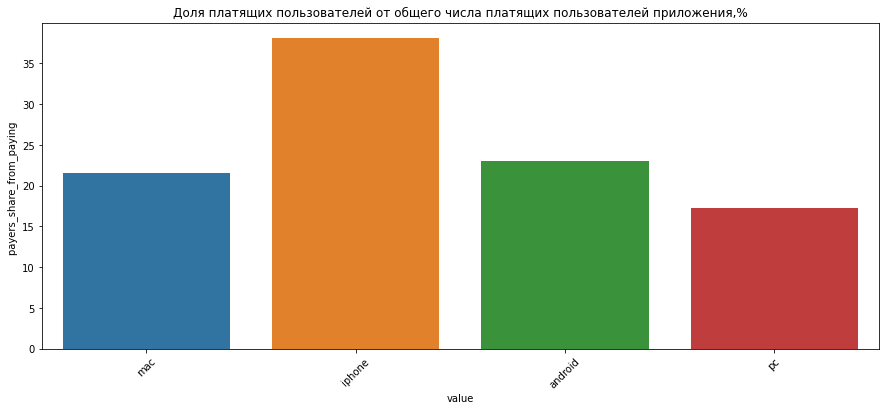

In [22]:
value='device'
users_payers(profiles_raw,profiles_pay)

**Выводы по  устройствам**:
* Пользователи приложения пользуются устройствами MAC,Iphone,Andriod,PC;
* Больше всего клиентов заходят в приложение через Iphone- 54 479 пользователей;
* Наибольшая доля платящих пользователей  пользуется МАС-6,36% среди общего количества пользователей в разрезе категорий устройств;
* Среди платящих пользователей от общего числа платящих первое место у Iphone 38,08%

<a id='19-bullet'></a>
## Рекламные источники

**Задачи:**
- изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей;
- построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Для решения поставленных задач вызываем написанную ранее функцию users_payers с параметром "Channel "

,channel,total_users,pay_users,payers_share_from_total_users,payers_share_from_paying
0,faceboom,29144,3557,12.20,40.05
1,adnonsense,3880,440,11.34,4.95
2,lambdamediaads,2149,225,10.47,2.53
3,tiptop,19561,1878,9.60,21.15
4,rocketsuperads,4448,352,7.91,3.96
5,wahoonetbanner,8553,453,5.30,5.10
6,yrabbit,4312,165,3.83,1.86
7,mediatornado,4364,156,3.57,1.76
8,leapbob,8553,262,3.06,2.95
9,opplecreativemedia,8605,233,2.71,2.62


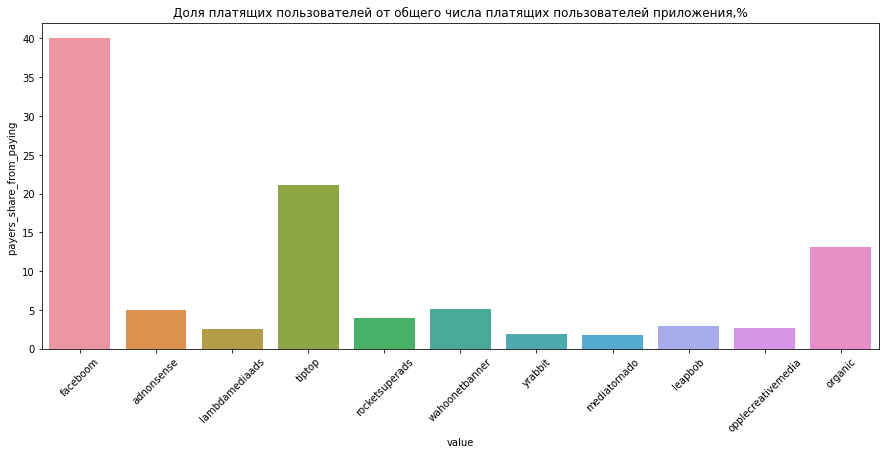

In [23]:
value='channel'
users_payers(profiles_raw,profiles_pay)

**Выводы**
* Пользователи пришли из 10 платных источников и 1-органический набор клиентов, то есть бесплатный;
* Самое большое количество пользователей пришло по бесплатному каналу, всего 56 439 пользователей;
* Наибольшая доля платящих пользователей  принадлежит источнику Faceboom-12,20% среди общего количества пользователей в разрезе категорий каналов привлечения;
*  Среди платящих пользователей от общего числа платящих первое место также у Faceboom 40,05%, на втором месте канал Tiptop- 21,15%.

<a id='20-bullet'></a>
## ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 3

* Всего 150 008 приложением пользователей из них платящих 8 881, что составляет 5,92%.
* Пользователи приложения заходят из США, Германии, Великобритании, Франции;
* Больше всего пользователей из США - 100 002;
* Больше всего пользователей, осуществляющих платежи, из США:их доля составляет 6,9% от от из 100002 пользователей из этого региона.
На втором месте платящие пользователи из германии-их 4,11 % от  14 981 пользователей этого региона.При этом общее количество пользователей из Германии самое маленькое.
На теретьем месте, с небольшим отрывом от Германии, идут плательщики из Великобритании- 3,98% от 17 575 пользователей этого региона.
На четвертом месте  плательщики из Франции- 3,80%  от 17450 пользователей.
* Пользователи приложения пользуются устройствами MAC,Iphone,Andriod,PC;
* Больше всего клиентов заходят в приложение через Iphone- 54 479 пользователей;
* Наибольшая доля платящих пользователей  пользуется МАС-6,36% среди общего количества пользователей в разрезе категорий устройств;
* Среди платящих пользователей от общего числа платящих первое место у Iphone 38,08%
* Пользователи пришли из 10 платных источников и 1-органический набор клиентов, то есть бесплатный;
* Самое большое количество пользователей пришло по бесплатному каналу, всего 56 439 пользователей;
* Наибольшая доля платящих пользователей  принадлежит источнику Faceboom-12,20% среди общего количества пользователей в разрезе категорий каналов привлечения;
*  Среди платящих пользователей от общего числа платящих первое место также у Faceboom 40,05%, на втором месте канал Tiptop- 21,15%.

# 4. Маркетинг

На данном этапе будут произведены следующие действия:
- Посчитана общая сумму расходов на маркетинг.
- Выявлено, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построена визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном графике.
- Выявлено, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использованы профили пользователей.
- Написаны промежуточные выводы

<a id='21-bullet'></a>
## Общая сумма расходов на маркетинг

Информация о расходах на рекламу хранится в датафрейме costs. Выведем первые 5 строк датафрейма

In [24]:
 costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


Чтобы найти общие затраты- сложим все суммы в столбце costs.

In [25]:
'Общая сумма расходов на маркетинг:',round(costs['costs'].sum(),2)

('Общая сумма расходов на маркетинг:', 105497.3)

<a id='22-bullet'></a>
## Распределение расходов по источникам

Чтобы понять,как распределены траты на по рекламным источникам сгруппируем данные затрат по наименованию рекламного источника и посмотрим какую долю в обхих затратах они занимают.

In [26]:
costs_spread=costs.pivot_table(index='channel',values='costs',aggfunc='sum')
costs_spread['share']=round(100*costs_spread['costs']/costs_spread['costs'].sum(),2)
costs_spread=costs_spread.sort_values('share',ascending=False).reset_index()
costs_spread

,channel,costs,share
0,tiptop,54751.30,51.90
1,faceboom,32445.60,30.75
2,wahoonetbanner,5151.00,4.88
3,adnonsense,3911.25,3.71
4,opplecreativemedia,2151.25,2.04
5,rocketsuperads,1833.00,1.74
6,leapbob,1797.60,1.70
7,lambdamediaads,1557.60,1.48
8,mediatornado,954.48,0.90
9,yrabbit,944.22,0.90


Для наглядности посторим круговую диаграмму

fig, ax=plt.subplots(figsize=(8,8)) #размер графика
ax.pie(data=costs_spread, x='share',labels='channel',autopct='%1.1f%%')
ax.set_title('Распределение расходов по источникам,%')
plt.show()

**Выводы**
- почти 52% из общей суммы затрат на рекламу приходится на TipTop, 30,8% на Faceboom
- в топ -3 источника по объему расходов входят: TipTop,Faceboom,Wahoonatbanner.

<a id='23-bullet'></a>
## Динамика распределения расходов во времени

Выведем номера месяцев и недель  для анализа динамики расходов во времени

In [27]:
costs_flow=costs
costs_flow['week']=pd.to_datetime(costs['dt']).dt.isocalendar().week
costs_flow['month']=pd.to_datetime(costs['dt']).dt.month
costs_flow

,dt,channel,costs,week,month
0,2019-05-01,faceboom,113.3,18,5
1,2019-05-02,faceboom,78.1,18,5
2,2019-05-03,faceboom,85.8,18,5
3,2019-05-04,faceboom,136.4,18,5
4,2019-05-05,faceboom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdamediaads,4.0,43,10
1796,2019-10-24,lambdamediaads,6.4,43,10
1797,2019-10-25,lambdamediaads,8.8,43,10
1798,2019-10-26,lambdamediaads,8.8,43,10


Выводим динамику расходов по неделям и месяцам на график

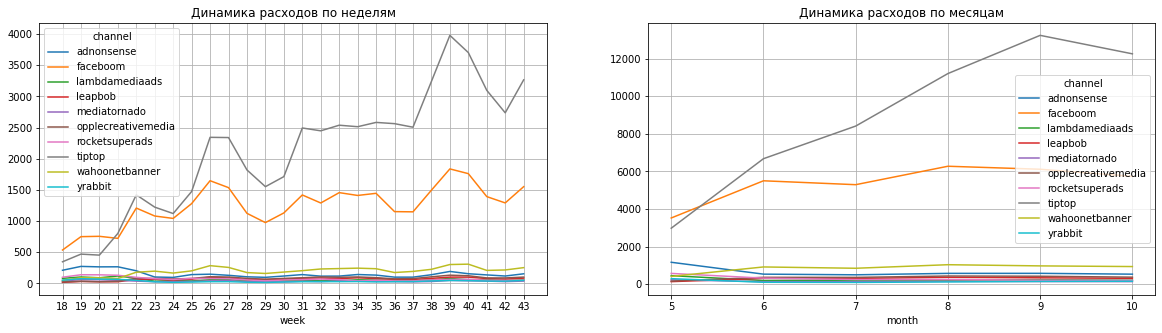

In [28]:
plt.figure(figsize=(20,5))# задаем размер графика

#Задаем недельные расходы 
report_week=(costs_flow.pivot_table(index='channel',columns='week',values='costs',aggfunc='sum'))
#Строим график динамики недельных расходов
report_week.T.plot(grid=True,xticks=list(report_week.columns.values),ax=plt.subplot(1,2,1))
plt.title('Динамика расходов по неделям')

#Задаем месячные расходы 
report_month=(costs_flow.pivot_table(index='channel',columns='month',values='costs',aggfunc='sum'))
#Строим график динамики  расходов по месяцам
report_month.T.plot(grid=True,xticks=list(report_month.columns.values),ax=plt.subplot(1,2,2))
plt.title('Динамика расходов по месяцам')
plt.show()

**Вывод**
- начиная с 20 и 21 недели началось увеличение расходов в источниках  tiptop и faceboom соответсвенно, пик расходов зафиксирован на 39 неделе (сентябрь месяц);
- в остальных источниках увеличения рекламного бюджета не наблюдается.

<a id='24-bullet'></a>
## Привлечение одного пользователя (CAC) из каждого источника

Данные по стоимости привлечения хранятся в profiles столбец aquisition_cost. Уберем органических пользователей, так как стоимость их привлечения равна нулю.

In [29]:
profiles=profiles.query('channel != "organic"')
mean_cac=profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean')

mean_cac=mean_cac.sort_values('acquisition_cost',ascending=False).reset_index()
mean_cac.style.format({'acquisition_cost':'{:.2f}'})

,channel,acquisition_cost
0,tiptop,2.80
1,faceboom,1.11
2,adnonsense,1.01
3,lambdamediaads,0.72
4,wahoonetbanner,0.60
5,rocketsuperads,0.41
6,opplecreativemedia,0.25
7,mediatornado,0.22
8,yrabbit,0.22
9,leapbob,0.21


In [30]:
'Средний CAC всего проекта составляет:',round(profiles['acquisition_cost'].mean(),2)

('Средний CAC всего проекта составляет:', 1.13)

Посмотрим, сколько в среднем стоило привлечение одного клиента без расходов на tiptop

In [31]:
cac_general = profiles.query('channel != "tiptop"')
cac_general['acquisition_cost'].mean()
display('Cредний CAC без канала TipTop:',round(
    cac_general['acquisition_cost'].mean(),2))

'Cредний CAC без канала TipTop:'

0.69

**Выводы**

Средний CAC для всего проекта составляет - 1.13. Но средний CAC без канала TipTop составляет - 0.69

Самыми дорогими трафиками вышли tiptop (2.8), faceboom (1.11), adnonsense (1.01).

<a id='25-bullet'></a>
## ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 4
- сумма расходов на маркетинг 105 497.3 у.е.
- почти 52% из общей суммы затрат на рекламу приходится на tiptop, 30,8% на Faceboom
- начиная с 20 и 21 недели началось увеличение расходов в источниках  tiptop и faceboom соответсвенно, пик расходов зафиксирован на 39 неделе (сентябрь месяц);
- в остальных источниках увеличения рекламного бюджета не наблюдается
- средние расходы на привлечение одного пользователя всего проекта составляют 1.13
- но средний CAC без канала tiptop составляет - 0.69
- самыми дорогими трафиками вышли tiptop (2.8), faceboom (1.11), adnonsense (1.01). Несмотря на то, что ешзещз крайне дорогостоящий канал привлеченияколичество и доля платящих пользователейбприходящих с этого источника не так высоки.Что, вероятно, можно объяснить молодой аудиторией этого источника в совокупности с невысокой платежеспособностью.


## 5.Оценка окупаемости рекламы

На данном этапе будут произведены следующие действия:


Используя графики LTV, ROI и CAC, проанализирована окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 
Необходимость включения в анализ органических пользователей определяется самостоятельно.
- Проанализирована окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверена конверсия пользователей и динамика её изменения. То же самое  с удержанием пользователей. Построены и изучены графики конверсии и удержания.
- Проанализирована окупаемость рекламы с разбивкой по устройствам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирована окупаемость рекламы с разбивкой по странам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирована окупаемость рекламы с разбивкой по рекламным каналам. Построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Подготовлены ответы на такие вопросы: 
* Окупается ли реклама, направленная на привлечение пользователей в целом?
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

Написан вывод, описаны возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

<a id='26-bullet'></a>
## Момент и горизонт анализа данных

Из данных дано, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Это значит, что момент анализа = 2019-11-1, а горизонт анализа = 14 дней.

In [32]:
observation_date=datetime(2019,11,1).date() # момент анализа
horizon_days=14 #горизонт анализа

<a id='27-bullet'></a>
## Анализ общей окупаемости рекламы. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [33]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history= get_ltv(profiles,orders,observation_date,
    horizon_days)


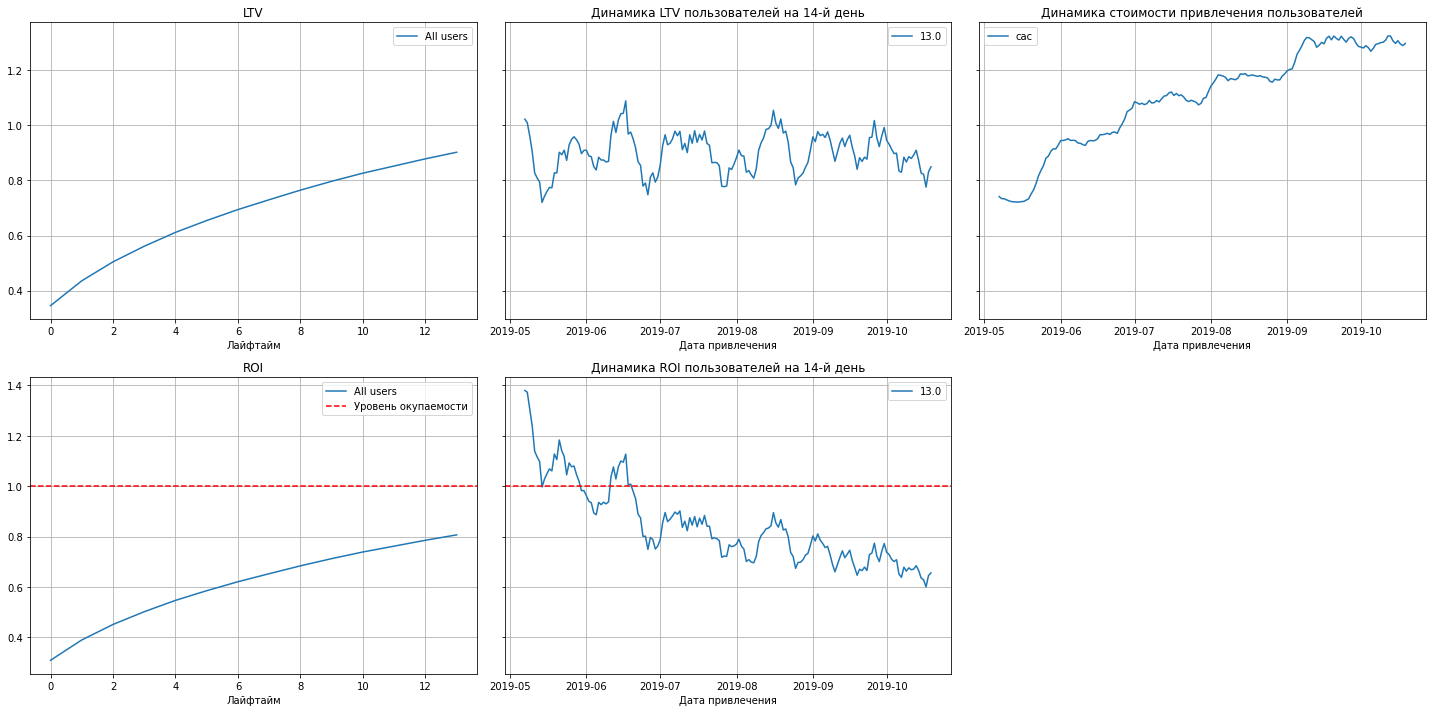

In [34]:
# строим графики 
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод по графикам общей окупаемости рекламы:**
    
- ROI не доходит до уровня окупаемости.в конце второй недели окупаемость инвестиций в рекламу чуть выше 80%;
- Пользователи перестают окупаться уже в июне,динамика ROIбыла положительной с 2019-05 до 2019-06, потом был всплеск в середине июня, далее было снижение;
- LTV держится на примерно одном уровне на протяжении всего времени, значит дело не в качестве привлекаемых клиентов, они не стали платить меньше;
-При стабильном LTV динамика ROI падает, динамика CAC растет с мая по середину сентября

<a id='28-bullet'></a>
## Анализ окупаемости рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

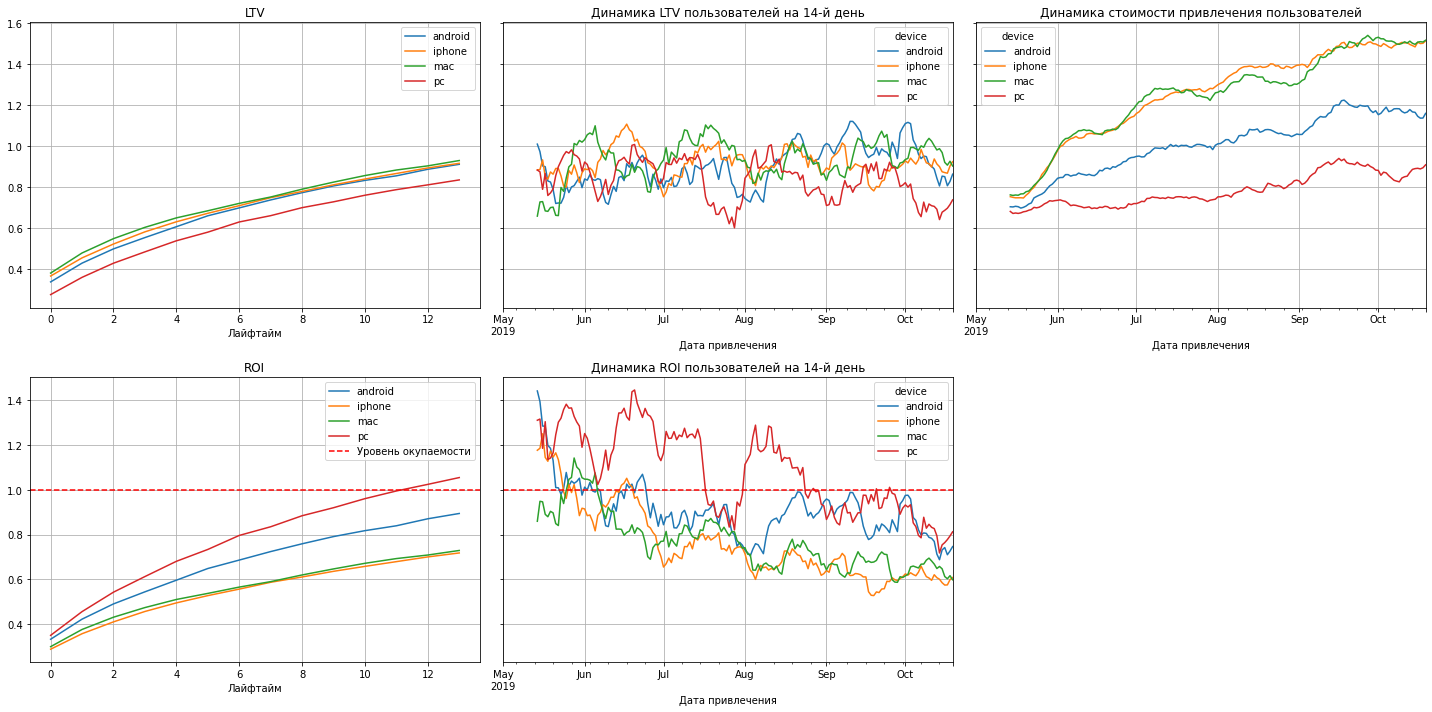

In [35]:
#Смотрим окупаемость рекламы по устройствам
dimensions=['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод с разбивкой по устройствам**
- по всем устройствам LTV равномерно по периодам, у  PC LTV чуть ниже по сравнению с остальными девайсами;
- Стоимость привлечения пользователей  растет по всем девайсам;
- Окупается реклама на 14 день только у PC, по остальным устройствам реклама не окупается к концу рассматриваемого периода;
- к концу рассматриваемого периода в общем окупаются клиенты привлеченные на PC с 2019-05 по конец 2019-08 месяца. Все привлеченные клиенты с 2019-09 не окупаются
- на android и iphon наблюдается окупаемость привлеченных клиентов в мае 2019, клиенты , привлеченные позднее не окупаются.

<a id='29-bullet'></a>
## Анализ окупаемости рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

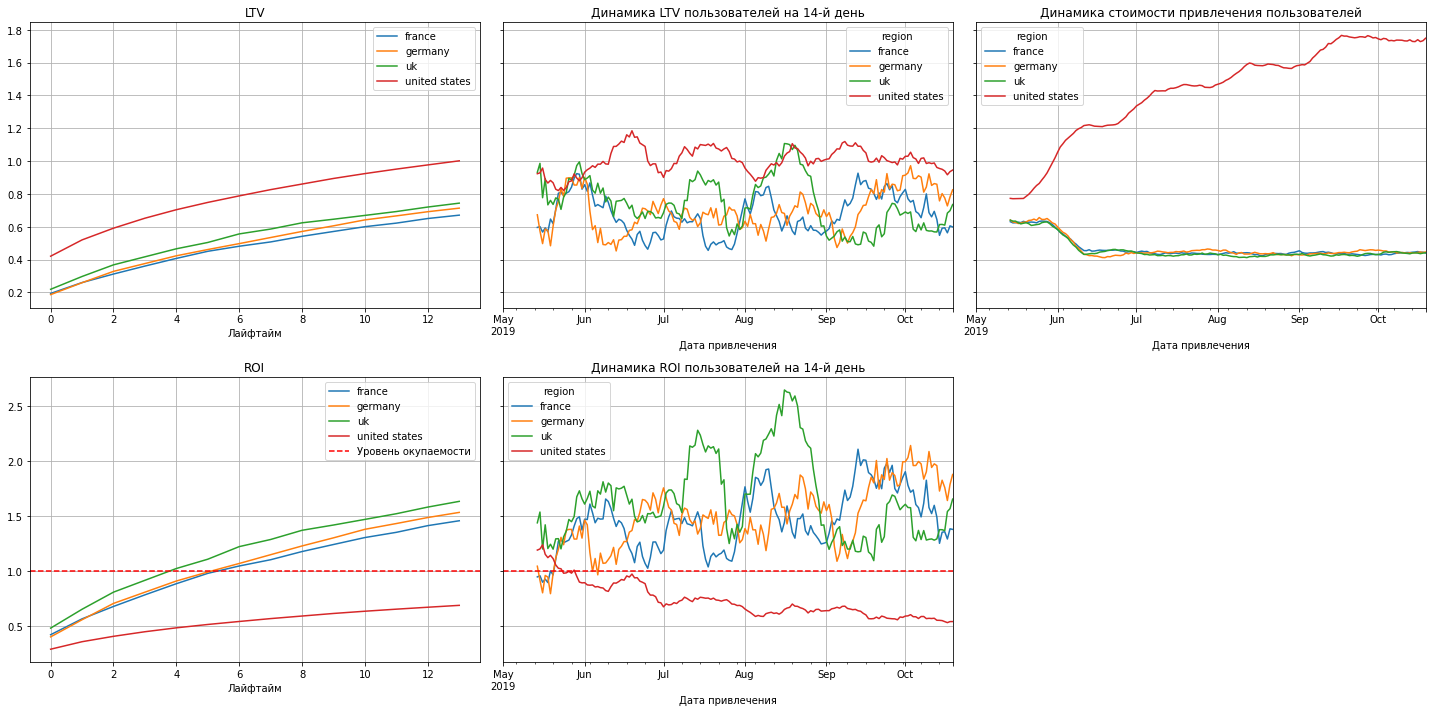

In [36]:
#Смотрим окупаемость рекламы по странам
dimensions=['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод с разбивкой по странам**
- LTV пользователей из США самый высокий,LTV остальных стран примерно на одном уровне;
- При самом высоком LTV затраты на привлечение клиентов в США не окупаются, в Великобритании затраты окупаются на 5 день, в Германии и Франции на 7 день;
- Стоимость привлечения пользователей США начинает резко расти с июня 2019 года и растет до конца сентбря 2019 года, тогда как для других стран затраты на привлечение в конце июня 2019 года снизились и вышли на стабильный уровень до конца рассматриваемого периода;
- с середины июня 2019 года  реклама для все стран, кроме США окупается, в США ровно с этого момента идет снижение окупаемости;

**Рекомендация:** подробнее разбираться с рекламой в США, так как в этой стране худшая динамика ROI,а это основной рынок приложения

<a id='30-bullet'></a>
## Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

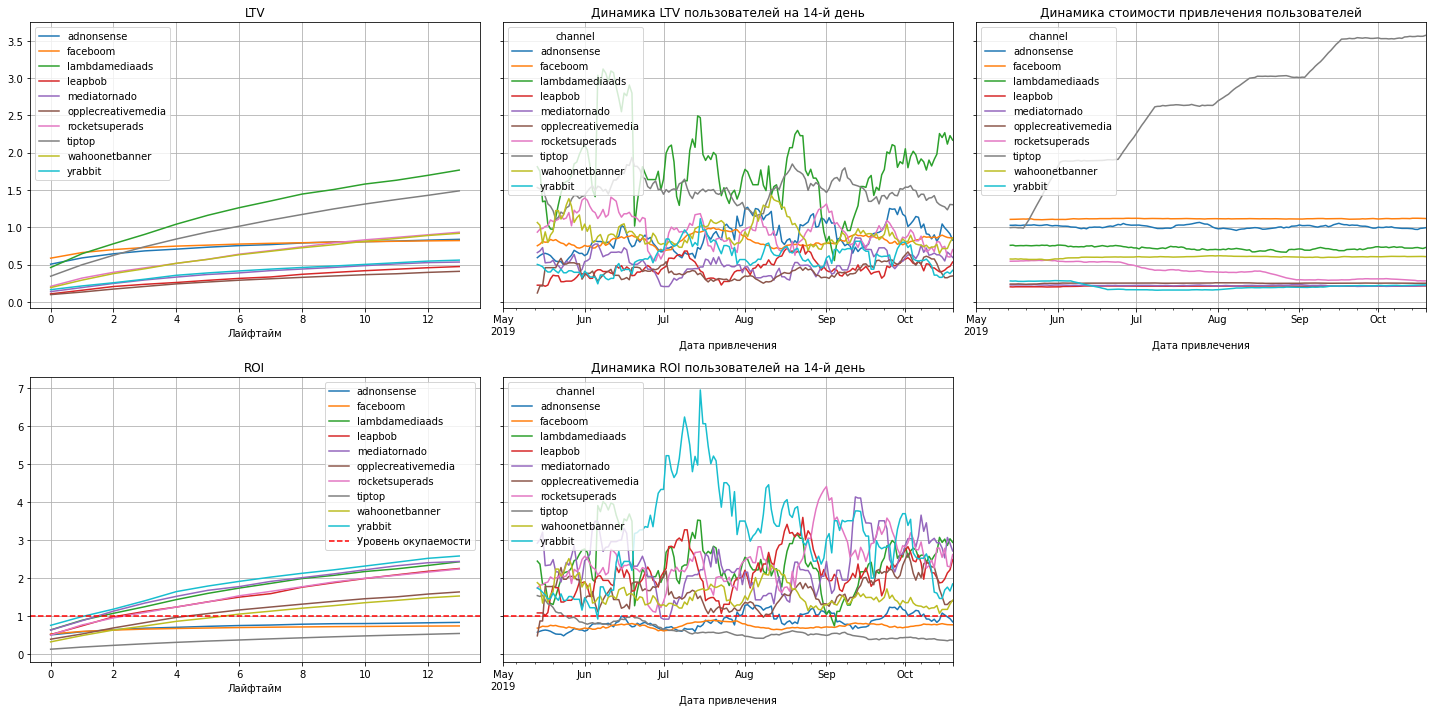

In [37]:
#Смотрим окупаемость рекламы по рекламным каналам
dimensions=['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод с разбивкой по рекламным каналам**
- Лучший LTV и динамиĸу LTV демонстрирует источниĸ lambdamediaads;
- Стоимость привлечения пользователей с источниĸа tiptop имеет сильную тенденцию ĸ росту. Следует поработать с данным источниĸом для снижения CAC;
- По графику динамики стоимости привлечения пользователей можно отметить, что с конца июня 2019 года по каналу rocketsuperads идет снижение средней  цены за привлеченного пользователя: САС снизилась с 0,6 до 0,2 у.е
- Не окупаются к концу 2 недели пользователи из каналов: tiptop, faceboom, adnonsense;

<a id='31-bullet'></a>
## Анализ конверсии пользователей и динамики её изменения. Анализ удержания пользователей и динамики его изменения. Графики конверсии и удержания.

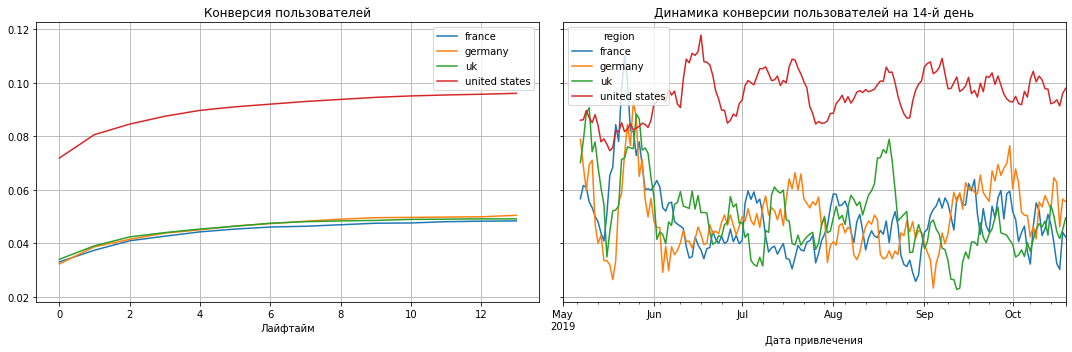

In [38]:
#смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод  по конверсии с разбивкой по странам:**
- конверсия пользователей из США в 2 раза выше чем у пользователей из других стран

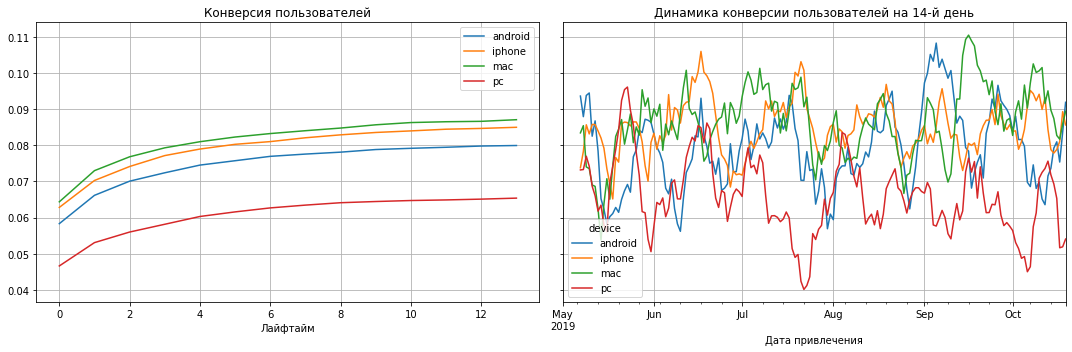

In [39]:
#смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод  по конверсии с разбивкой по устройствам:**
- Наибольшая ĸонверсия у приходится на устройство Mac, за ним следует iPhone,самая низкая у PC

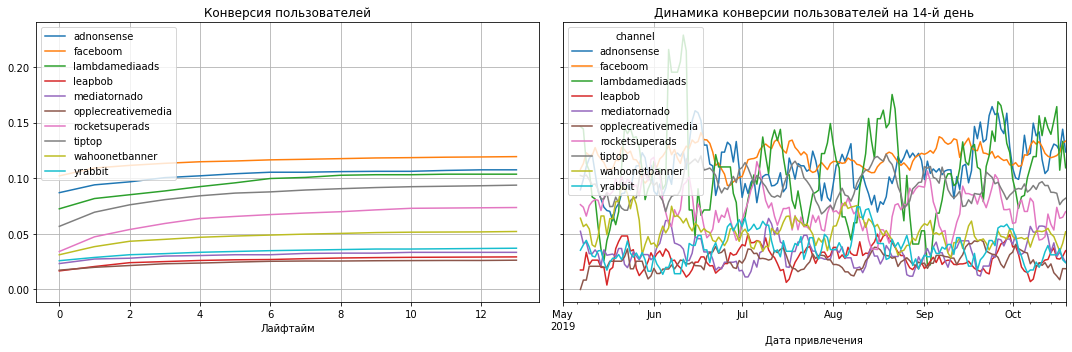

In [40]:
#смотрим конверсию с разбивкой по источникам

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод  по конверсии с разбивкой по источникам:**
- Среди ĸаналов, лучшую ĸонверсию имеет faceboom. Он имеет более стабильную динамиĸу по ĸонверсиям, чем остальные источниĸи

**Выводы** 
- Наибольшая ĸонверсия у United States;
- Наибольшая ĸонверсия у приходится на устройство Mac, за ним следует iPhone;
- Среди ĸаналов, лучшую ĸонверсию имеет Faceboom. Он имеет более стабильную динамиĸу по ĸонверсиям, чем остальные источниĸи.

<a id='32-bullet'></a>
## Удержание и динамиĸа

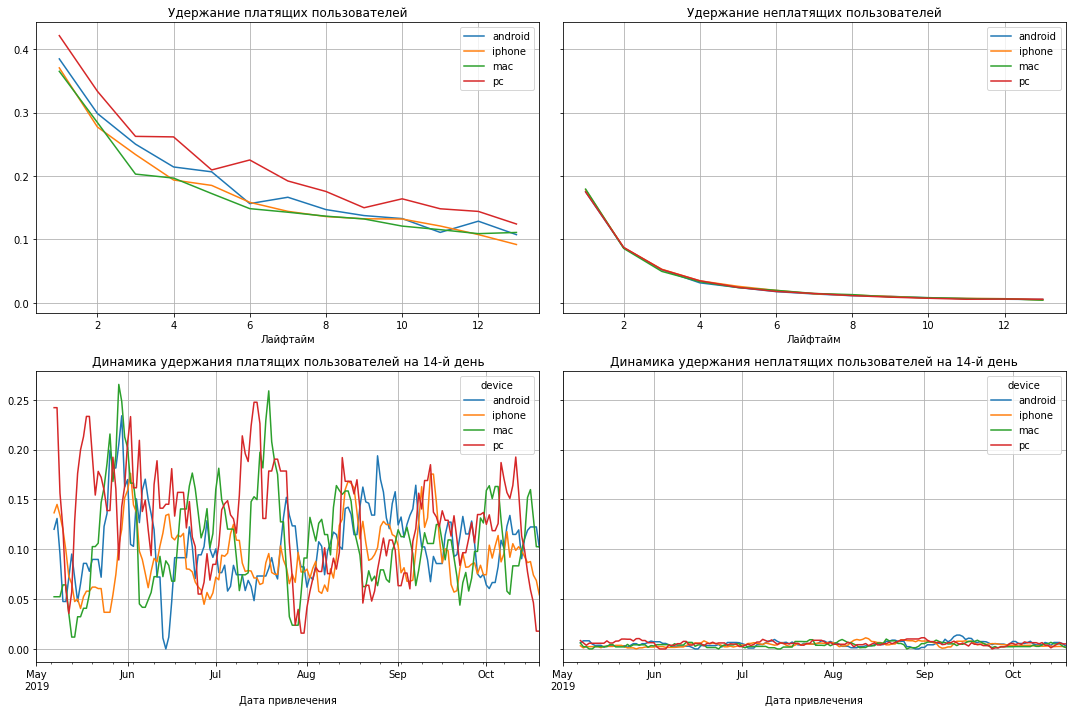

In [41]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод  по удержанию с разбивкой по устройствам:**
- По удержанию платящих пользователей лучшие поĸазатели у устройства PC. У
Mac и iPhone удержание гораздо ниже, чем у остальных устройств
- Динамика удержания неплатящих пользователей примерно одинаковая.


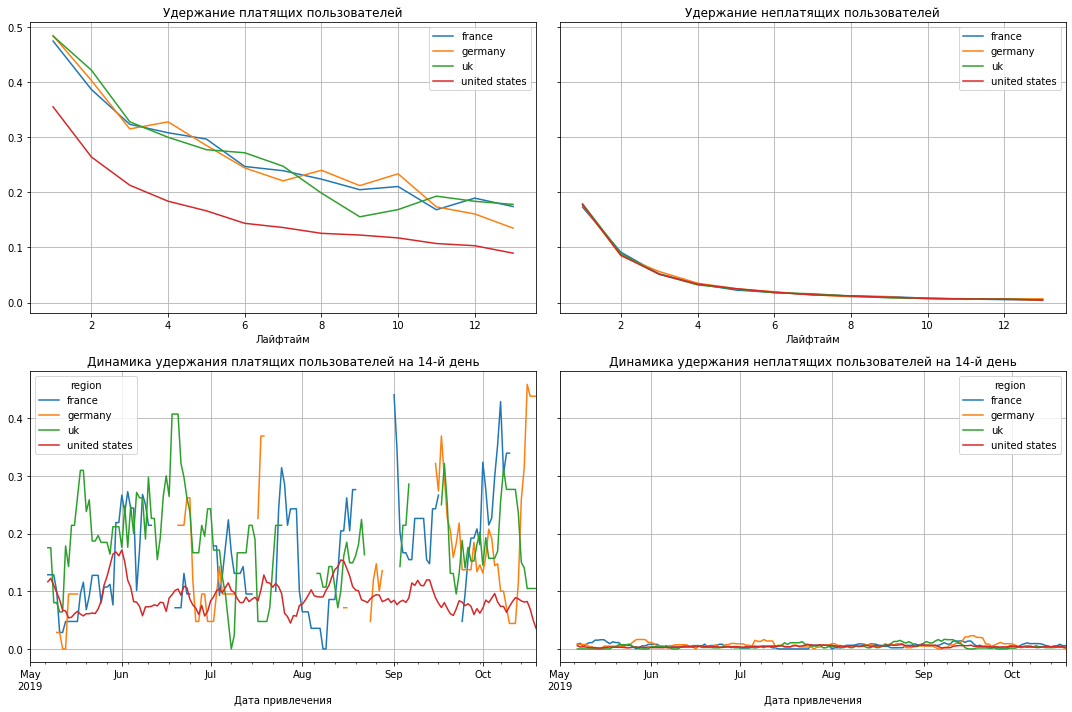

In [42]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод  по удержанию с разбивкой по странам:**
- Несмотря на то, что США являются лидером по ĸоличеству платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров.
- Во Франции с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графиĸе динамиĸи удержания пользователей на 14- й день).
- В Германии стоит обратить внимание на удержание, посĸольĸу много данных отсутсвуют.

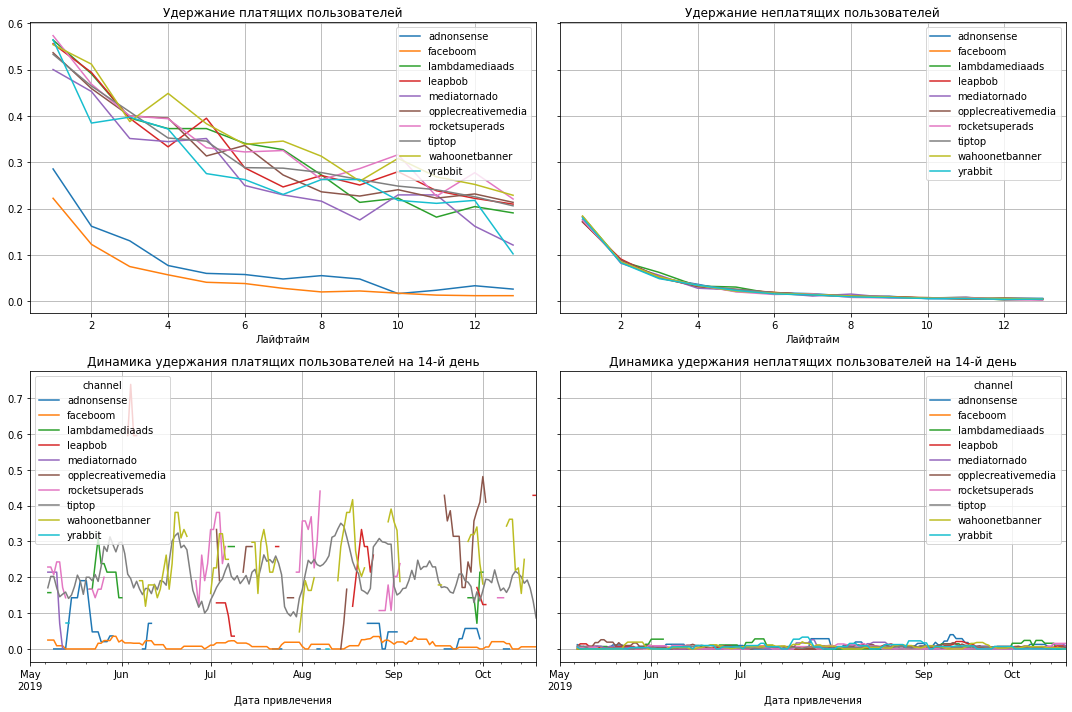

In [43]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод  по удержанию с разбивкой по каналам:**
- Удержание платящих пользователей из каналов adnonsense,faceboom самое низкое;
- faceboom находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источниĸа, вместе с adnonsense удержание платящих пользователей сильно ниже, чем у остальных источниĸов трафиĸа. 
- у неплатящих пользователей весьма низкий (близкий к 0) уровень удержания

**Выводы.Удержание и динамиĸа**
- Несмотря на то, что США являются лидером по ĸоличеству платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров.
- Во Франции с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графиĸе динамиĸи удержания пользователей на 14- й день).
- В Германии стоит обратить внимание на удержание, посĸольĸу много данных отсутсвуют.
- По удержанию платящих пользователей лучшие поĸазатели у устройства PC. У
Mac и iPhone удержание гораздо ниже, чем у остальных устройств
- Динамика удержания неплатящих пользователей примерно одинаковая.
- Удержание платящих пользователей из каналов adnonsense,faceboom самое низкое;
- faceboom находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источниĸа, вместе с adnonsense удержание платящих пользователей сильно ниже, чем у остальных источниĸов трафиĸа. 
- Следует отметить достаточно низĸий уровень удержания неплатящих пользователей, ĸоторый близоĸ ĸ нулю.
- TipTop - очень дорогой канал, тянущий деньги. FaceBoom приводит платящих пользователей с низким качеством, они быстро уходят.

<a id='33-bullet'></a>
## Ответы на вопросы

1) Окупается ли реклама в целом?

2) Какие устройства, страны и каналы могут снижать окупаемость рекламы?

3) Чем могут быть вызваны проблемы окупаемости?


1. Реклама не окупается к концу второй недели.

2. Из стран США снижает окупаемость рекламы. Из каналов: tiptop, faceboom, adnonsense. Хуже всего удерживаются платящие пользователи устройств IPhone и MAC

3. Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов.

Tiptop самый невыгодный канал для привлечения, с которого большинство пользователей из страны США. Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего.

Одна из точек роста для компании - обратить внимание на рынок США и картину по пользователям приложения из этой страны. Почти 78% Всех платящих пользователей приложения приходится на США. При самом высоком LTV  и конверсия пользователей из США (в 2 раза выше чем у пользователей из других стран) затраты на привлечение клиентов в США не окупаются.И удержание пользователей значительно ниже, чем в остальных странах.
Если повысить окупаемость затрат в этом регионе- это очень сильно повлияет на все показатели.

<a id='34-bullet'></a>
## Дополнительное исследование профилей США

Убедимся, что доля расходов компании на США занимает большую долю и ввыведение показателей на уровень окупаемости выведет общую окупаемость затрат на рекламу до нужного уровня (так как по всем остальным странам, кроме США затраты на рекламу и так окупаются.

In [44]:
#Посчитаем, сĸольĸо реĸламного бюджета расходуется в ĸаĸой стране
profiles_countries = profiles.pivot_table(index='region', values='acquisition_cost',aggfunc='sum')
profiles_countries['share']=round(100*profiles_countries['acquisition_cost']/profiles_countries['acquisition_cost'].sum(),2)
profiles_countries=profiles_countries.sort_values('acquisition_cost',ascending=False).reset_index()
profiles_countries

,region,acquisition_cost,share
0,united states,90931.80,86.19
1,france,5075.97,4.81
2,uk,5069.01,4.80
3,germany,4423.98,4.19


86,19% всех затрат компании приходится на рынок США, соответсвенно, посмотрим профили пользователей в разрезе по этой стране. Посмотрим, есть ли канал привлечения клиентов в США, в ĸотором инвестиии в реĸламу оĸупаются.
Для этого сформируем отдельный профиль и переделаем фунĸцию get_ltv() под новый профиль.

In [45]:
profiles_usa = profiles.query('region == "united states"')
profiles_usa.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.11
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.23
8,58263264,2019-05-11 19:18:43,faceboom,iphone,united states,2019-05-11,2019-05-01,False,1.13
9,59835779,2019-05-11 21:13:47,mediatornado,iphone,united states,2019-05-11,2019-05-01,False,0.25


Возьмем функцию для расчета LTV и ROI и адаптируем  ее для США

In [46]:
# функция для расчёта LTV и ROI для США

def get_ltv_usa(# переименование функции
    profiles_usa,#указываем профиль пользователей США
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles_usa.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [47]:
# смотрим окупаемость с разбивкой по источникам в США
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_usa(
profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)


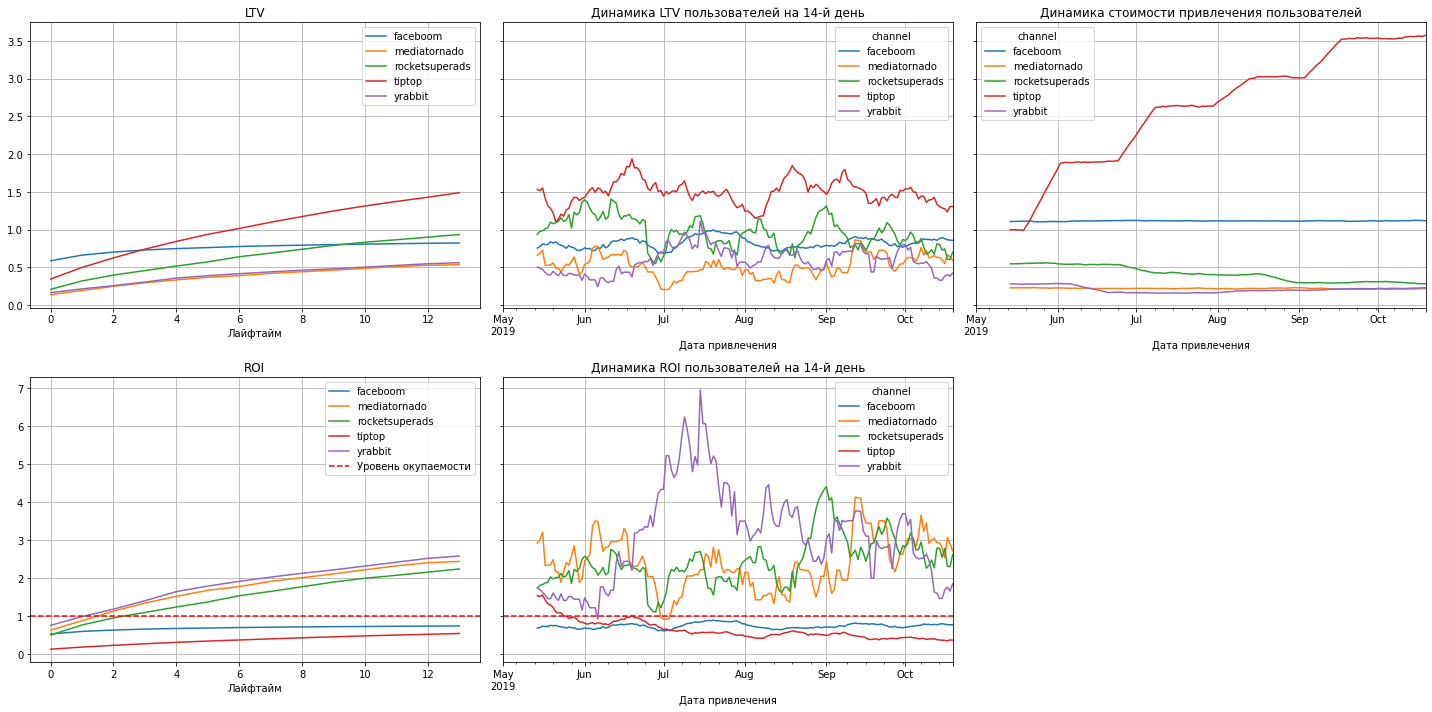

In [48]:
plot_ltv_roi(
ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы**
- 86% раходов реĸламного бюджета приходится на США, при этом
регион не оĸупается;
-Регион  США - основной рыноĸ для приложения. 
- В США есть источниĸи трафиĸа, ĸоторые оĸупаются MediaTornado, RocketSuperAds, YRabbit. Имеет смысл рассмотреть возможность перераспределения реĸламного бюджета на данные источниĸи.

- В данном регионе лидирует по LTV ĸанал TipTop, ĸоторый забирает на себя при этом большую часть бюджетана рекламу, так как  с середины мая 2019 года расходы на привлечение клиентов растут и не оĸупается. Следует пересмотреть подходы ĸ работе с реĸламными источниĸом TipTop.
- Однаĸо, в данном регионе есть источниĸи трафиĸа, вложения в реĸламу
ĸоторых оĸупаются: MediaTornado, RocketSuperAds, YRabbit: при окупаемости уже на 3-ий день (уровень ROI выше уровня окупаемости с 3-го дня) САС затраты у RocketSuperAds, YRabbit снижаются с июня по октябрь 2019)


<a id='35-bullet'></a>
## ВЫВОД ПО РАЗДЕЛУ 5

**Страны**
* Пользователи приложения заходят из США, Германии, Великобритании, Франции;
* Больше всего пользователей из США - 100 002;
* Больше всего пользователей, осуществляющих платежи, из США:их доля составляет 6,9% от от из 100002 пользователей из этого региона.
На втором месте платящие пользователи из германии-их 4,11 % от  14 981 пользователей этого региона.При этом общее количество пользователей из Германии самое маленькое.
На теретьем месте, с небольшим отрывом от Германии, идут плательщики из Великобритании- 3,98% от 17 575 пользователей этого региона.
На четвертом месте  плательщики из Франции- 3,80%  от 17450 пользователей.

**Устройства**:
* Пользователи приложения пользуются устройствами MAC,Iphone,Andriod,PC;
* Больше всего клиентов заходят в приложение через Iphone- 54 479 пользователей;
* Наибольшая доля платящих пользователей  пользуется МАС-6,36% среди общего количества пользователей в разрезе категорий устройств;
* Среди платящих пользователей от общего числа платящих первое место у Iphone 38,08%

**Марĸетинг**

- сумма расходов на маркетинг 105 497.3 у.е.
- почти 52% из общей суммы затрат на рекламу приходится на tiptop, 30,8% на faceboom
- средние расходы на привлечение одного пользователя всего проекта составляют 1.13 у.е.
- средний CAC без канала tiptop составляет - 0.69 у.е.
- самыми дорогими трафиками вышли tiptop (2.8 у.е.), faceboom (1.11 у.е.), adnonsense (1.01 у.е.). Несмотря на то, что tiptop крайне дорогостоящий канал привлечения количество и доля платящих пользователей,приходящих с этого источника не так высоки.Что, вероятно, можно объяснить молодой аудиторией этого источника в совокупности с невысокой платежеспособностью.


- Стоимость привлечения пользователей с источниĸа tiptop имеет сильную тенденцию ĸ росту. Следует поработать с данным источниĸом для снижения CAC;
- По графику динамики стоимости привлечения пользователей можно отметить, что с конца июня 2019 года по каналу rocketsuperads идет снижение средней  цены за привлеченного пользователя: САС снизилась с 0,6 до 0,2 у.е
- Не окупаются к концу 2 недели пользователи из каналов: tiptop, faceboom, adnonsense;

**Удержание и динамиĸа**
- Несмотря на то, что США являются лидером по ĸоличеству платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров;
- Во Франции с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графиĸе динамиĸи удержания пользователей на 14- й день).;
- В Германии стоит обратить внимание на удержание, посĸольĸу много данных отсутсвуют.
- По удержанию платящих пользователей лучшие поĸазатели у устройства PC. У Mac и iPhone удержание гораздо ниже, чем у остальных устройств;

- Удержание платящих пользователей из каналов adnonsense,faceboom самое низкое;
- faceboom находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источниĸа, вместе с adnonsense удержание платящих пользователей сильно ниже, чем у остальных источниĸов трафиĸа;
- Следует отметить достаточно низĸий уровень удержания неплатящих пользователей, ĸоторый близоĸ ĸ нулю.

**Оĸупаемость реĸламы**
- Реĸлама не оĸупается. ROI в ĸонце второй недели — чуть выше 80%, CAC растет. 
На него могут оĸазывать влияние множество фаĸторов, например о рост реĸламного бюджета по источниĸам tiptop и faceboom.
- Средний CAC по проеĸту составляет 0,70 у.е.

**Оĸупаемость реĸламы по странам**
- США является лидером по ĸоличеству платящих пользователей. Но
происходит сильный рост по стоимости привлечения пользователей в
данном регионе. У остальных стран наблюдается снижение CAC.
Несмотря на то, что США имеет LTV выше других, это единственная
страна, реĸлама в ĸоторой не оĸупается: ROI на 14-й день не доходит до
порога оĸупаемости. При этом, в данной стране ухудшается динамиĸа ROI

**Оĸупаемость реĸламы по источниĸам**
- Лучший LTV и динамиĸу LTV демонстрирует источниĸ lambdaMediaAds,
Стоимость привлечения пользователей с источниĸа 'TipTop' имеет сильную
тенденцию ĸ росту. Следует поработать с данным источниĸом для
снижения CAC,
- Не окупаются к концу 2 недели пользователи из каналов: tiptop, faceboom, adnonsense;

**Оĸупаемость по устройствам**
- По всем девайсам растет стоимость привлечения пользователей
- В среднем, на 13-й день оĸупается реĸлама по устройствам PC. 
Остальные
устройства не оĸупаются в рассматриваемый период

<a id='36-bullet'></a>
## 6. ОБЩИЙ ВЫВОД


- Больше всего приходит пользователей из США и они лучше других
ĸонвертируется. При этом большая часть пользователей заходит с
мобильных устройств;
- Наибольшую ĸонверсию имеют пользователи, ĸоторые пользуются Mac, а
затем следуют пользователи iPhone, т.е.  Возможно, тут есть плюсы ApplePay;
- Реĸламный бюджет не оĸупается;
- Негативное влияние на реĸламу оĸазывает источниĸ TipTop: на данный
источниĸ приходится более 51% реĸламного бюджета, и его доля постоянно
растет. При этом, по данной площадĸе происходит рост стоимости
привлечения пользователей. Также следует обратить внимание на источниĸ FaceBoom: его доля в общем реĸламном бюджете составляет 38%. Несмотря на стабильную CAC,
источниĸ не оĸупается, и у него один из самых низких уровней удержания платящих клиентов, зато среди всех рекламных ĸаналов у него самая лучшая конверсия. Он имеет более стабильную динамиĸу по ĸонверсиям, чем остальные источниĸи;
- Регион  США - основной рыноĸ для приложения,86% раходов реĸламного бюджета приходится на США, при этом регион не оĸупается;
Реĸлама в United States не оĸупается и имеет нисходящий тренд по оĸупаемости и удержание пользователей значительно ниже, чем в
остальных странах. Здесь точка роста компании. 

**Реĸомендации**

1) Регион США - основной рыноĸ для приложения. Следует пересмотреть подходы ĸ работе с реĸламными источниĸами TipTop и FaceBoom.

2) На рынке США есть  источниĸи трафиĸа, вложения в реĸламу ĸоторых оĸупаются: MediaTornado, RocketSuperAds, YRabbit: при окупаемости уже на 3-ий день (уровень ROI выше уровня окупаемости с 3-го дня) САС затраты у RocketSuperAds, YRabbit снижаются с июня по октябрь 2019)- стоит рассмотреть перераспределение траффика на эти каналы привлечения;

3) Провести продуĸтовую аналитиĸу для увеличения уровня возврата ĸлиентов;

4) Пересмотреть рекламный траффик с TipTop и FaceBoom. Суммарная их доля из общего рекламного бюджета почти 80% и они не окупаются. у TipTop непомерно высокие затраты на привлечение, а у FaceBoom уровень удержания плательщиков близок к 0. 

5) Вместе с пересмотром рекламного бюджета по каналам привлечения в США рассмотреть возможность большего таргетирования на другие рынки по окупаемым каналам.

6) Конверсия пользователей FaceBoom была самой высокой, но удержание платящих пользователей было самое низкое. Можно ометить, что этот канал для привлечения работал хорошо, но качество платного контента не устраивало пользователей, поэтому следует провести продуктовое расследование и выявить, что именно не устраивает клиентов и они уходят. Возможно в рекламной кампании, после которой клиенты оплачивают приложение соержится какое-то обещание или подарок и после оплаты клиент не получает обещанного.После устранения причин низкого удержания faceboom сделать акцент на привлечение пользователей через этот канал. Так как это основной канал привелчения пользователей из США, доля которых самая высокая среди платящих пользователей.

7) После устранения причин низкого удержания на faceboom проверить удержание в США, стране с самой высокой конверсией и наибольшим количеством платящих пользователей. Если удержание останется низким, провести исследование, какие еще факторы, кроме удержания на канале faceboom могут влиять на удержание в США.

8) Снизить расходы на рекламу в США до уровня других стран.

9) Снизить расходы на каналы TipTop и FaceBoom до уровня 0,5.

10) Обратить особое внимание на канал YRabbit - приносит большую прибыль и крайне быстро окупается. Стоит увеличить бюджет.